## Set Working Directory for Relative Imports

In [22]:
import os

In [23]:
os.getcwd()

'/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis'

In [24]:
# If path is not DSA4263-Voice-of-Customer-VOC-analysis, set it to that!
os.chdir(path='/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis') 
os.getcwd()

'/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis'

## Training Demo

## Import Packages

In [4]:
# User-defined packages
from root.src.preprocessing import *
from root.src.model.sa import *

/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root/voc_venv_new/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/nnerella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# For reading reviews.csv
import pandas as pd

## Read Raw Data 'reviews.csv'

In [6]:
reviews_csv = pd.read_csv('root/data/raw/reviews.csv')
reviews_csv.head()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...


In [20]:
reviews_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  5444 non-null   object
 1   Time       5444 non-null   object
 2   Text       5444 non-null   object
dtypes: object(3)
memory usage: 127.7+ KB


The data is of reviews from cutsomers from 2017-07-12 to 2021-12-10, a period of about 4 years 5 months.

positive    4030
negative    1414
Name: Sentiment, dtype: int64


<AxesSubplot: >

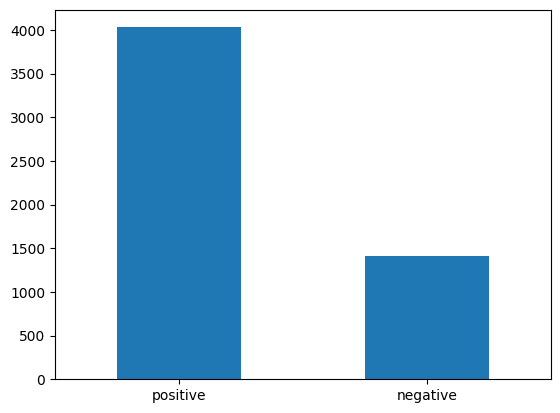

In [21]:
print(reviews_csv['Sentiment'].value_counts())
reviews_csv['Sentiment'].value_counts().plot(kind='bar', rot = 0)

#### The data is **imablanced**, there are way more positive reviews than negative reviews 

## Train - Test Split

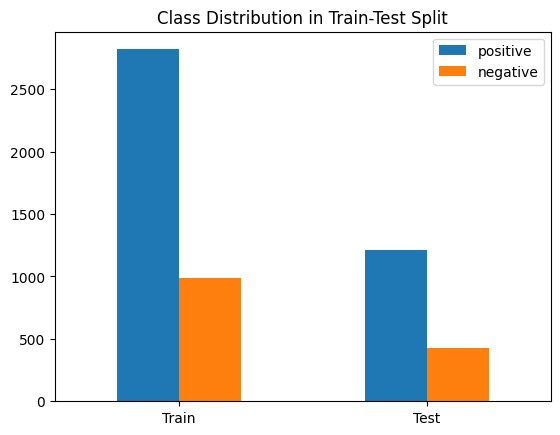

In [22]:
# Split the Processed data for training and testing
train_data, test_data = sa_train_test_split(reviews_csv)

Class Distribution Table

|             |    Train    |     Test    |
| ----------- | ----------- | ----------- |
|  Positive   |    2820     |     1210    |
|  Negative   |    990      |     424     |
|    Total    |    3810     |     1634    |

#### In order to handle the class imbalance, we use **nlp-aug** to create an additional augmeneted review for each negative review by replacing words in the negative review with its synonyms. Hence, in the output of SA_PREPROCESS_TRAIN() function, **the no. of negative training examples are doubled**.

## Preprocess data into Embeddings 
### Methodology: concating Word2Vec, TF-IDF and applying PCA

In [23]:
# Train data for model training
features_df_train = SA_PREPROCESS_TRAIN(train_data)
features_df_train.head()

Shape after augmenting negative training samples:  (4800, 3)


In [ ]:
# Train Data for pre-trained models
flair_train = PREPROCESS_FLAIR(train_data)
flair_train.head()

,Sentiment,Time,Text
3838,1,15/4/21,I ordered these to make sachets for baby showe...
3553,1,13/6/20,Nice flavor-not overly ginger-hot. Quick ship ...
4730,0,24/10/21,I went to check out and found out that the fre...
4802,0,17/4/21,I purchased 6 boxes as gifts at $21 per box. ...
4537,0,25/8/21,I opened this product to find that the lollipo...


Class Distribution Table

|             |    Train Before    |     Train after Pre-process    |
| ----------- | ----------- | ----------- |
|  Positive   |    2820     |     2820    |
|  Negative   |    990      |     1980    |
|    Total    |    3810     |     4800    |

In [ ]:
# Test Data
features_df_test, flair_test = SA_PREPROCESS_TEST(test_data)
features_df_test.head()

,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2664,PC_tfidf2665,PC_tfidf2666,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,0.009392,-0.001030,0.025862,0.089727,-0.118493,-0.104282,0.036970,-0.087358,0.148801,0.028446,...,-0.015185,0.002181,-0.007437,-0.632644,0.520196,-0.045523,-0.129502,0.013951,0.080418,1
1,-0.040228,0.020083,0.038282,0.091072,-0.018080,-0.048199,0.035149,-0.015175,-0.012409,0.131539,...,-0.000503,0.007863,-0.009261,-1.090999,-0.091023,-0.879310,-0.103714,-0.219973,0.074733,1
2,-0.056960,-0.028402,0.000151,0.068146,0.102733,0.015989,0.013255,-0.034866,0.031454,-0.051450,...,0.002153,-0.008343,0.005578,-0.921002,-0.619060,-0.198826,0.242274,-0.150495,0.163330,1
3,-0.048401,-0.050857,-0.016151,-0.091316,0.024649,-0.046187,-0.068599,-0.023487,0.025618,-0.016030,...,-0.005314,-0.000702,-0.001120,-0.110062,0.759278,0.826444,0.143478,-0.213736,0.104287,0
4,0.020266,0.036870,0.052192,0.213291,-0.152914,-0.140457,0.065814,-0.146735,0.147553,-0.015514,...,0.009095,0.004762,0.014783,-0.738187,0.230729,-0.636107,-0.130801,0.075524,0.145294,0


In [ ]:
flair_test.head()

,Sentiment,Time,Text
67,1,17/4/21,I am a die hard soda pop fan. I will drink jui...
2440,1,9/12/20,As i have stated before i love cheery flavor s...
3581,1,8/9/20,These are very good. Nice and soft. Would for ...
4385,0,10/7/21,this item is over priced. I but the 12oz pack...
4985,0,20/11/19,"Although some may like this drink, it will not..."


## Baseline : Naive Baye's Classifier

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.7145833333333333
Average Cross Validation score F1 :0.7343827017145866
Average Cross Validation score F1_weighted :0.7156230671123778
Average Cross Validation score pr_auc :0.8080653126841597
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.23      0.39      0.29       424
           1       0.72      0.55      0.62      1210

    accuracy                           0.51      1634
   macro avg       0.48      0.47      0.46      1634
weighted avg       0.59      0.51      0.54      1634

PR_AUC score:  0.7186101222549005


<Figure size 640x480 with 0 Axes>

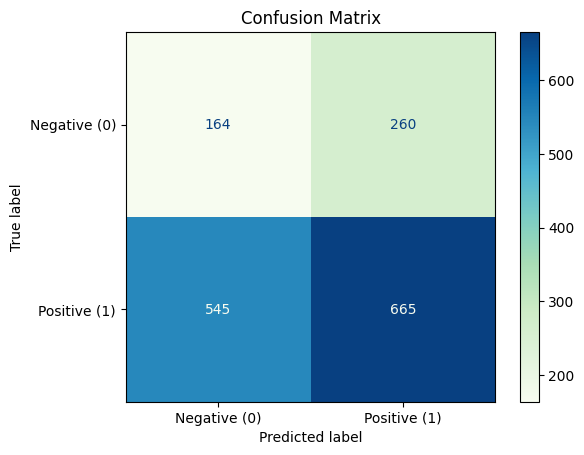

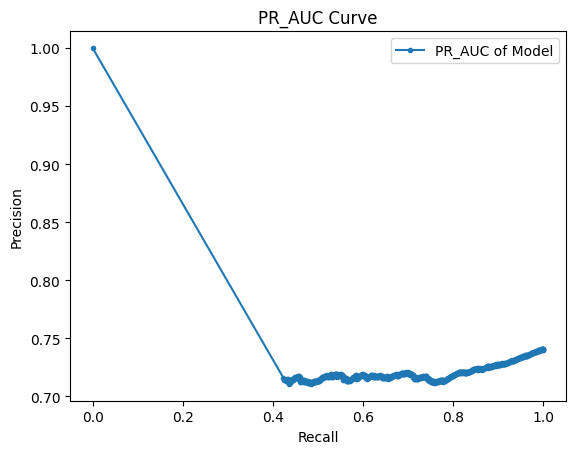

In [ ]:
bayes_classifier(features_df_train,features_df_test)

## Logistic Regression

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.8799999999999999
Average Cross Validation score F1 :0.9002293682920651
Average Cross Validation score F1_weighted :0.878878174811228
Average Cross Validation score pr_auc :0.9645736110166059
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       424
           1       0.90      0.91      0.91      1210

    accuracy                           0.86      1634
   macro avg       0.82      0.82      0.82      1634
weighted avg       0.86      0.86      0.86      1634

PR_AUC score:  0.9625630951380236


<Figure size 640x480 with 0 Axes>

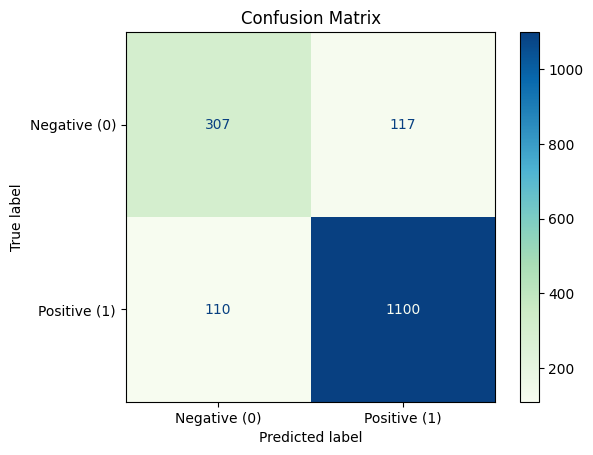

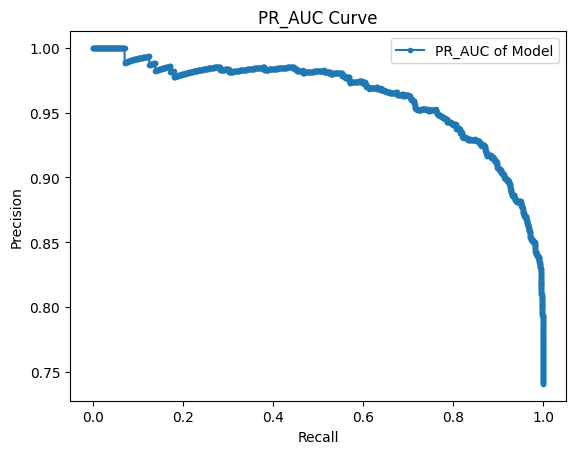

In [ ]:
logistic_regression(features_df_train,features_df_test)

## Non-Linear SVM

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.8966666666666667
Average Cross Validation score F1 :0.9127702983044749
Average Cross Validation score F1_weighted :0.8962624253345266
Average Cross Validation score pr_auc :0.9725860735478132
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       424
           1       0.91      0.92      0.92      1210

    accuracy                           0.88      1634
   macro avg       0.84      0.83      0.84      1634
weighted avg       0.87      0.88      0.87      1634

PR_AUC score:  0.9680708888532217


<Figure size 640x480 with 0 Axes>

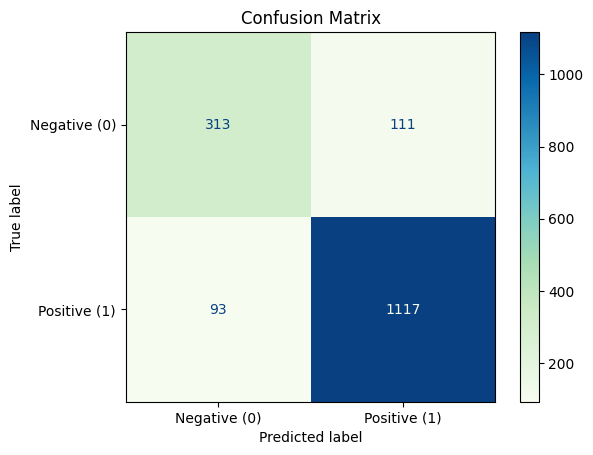

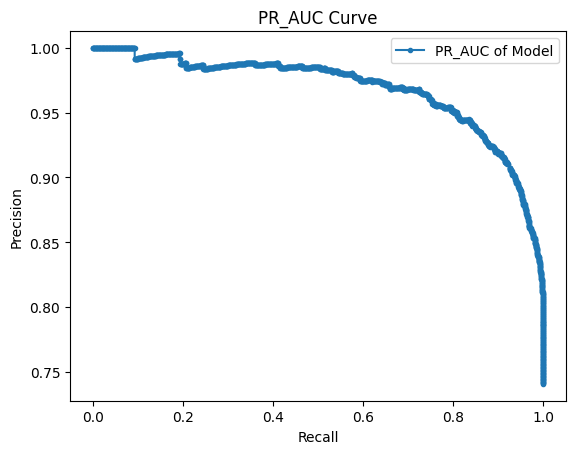

In [ ]:
svc_model(features_df_train,features_df_test)

## XGBoost

CROSS VALIDATION RESULTS XGBoost
Average Cross Validation score accuracy:  0.8997916666666665
Average Cross Validation score F1:  0.9161589379822279
Average Cross Validation score F1_weighted:  0.8993522130429034
Average Cross Validation score pr_auc:  0.9644649490491443
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       424
           1       0.84      0.91      0.87      1210

    accuracy                           0.80      1634
   macro avg       0.75      0.70      0.72      1634
weighted avg       0.79      0.80      0.79      1634

PR_AUC score:  0.9368755774122679


<Figure size 640x480 with 0 Axes>

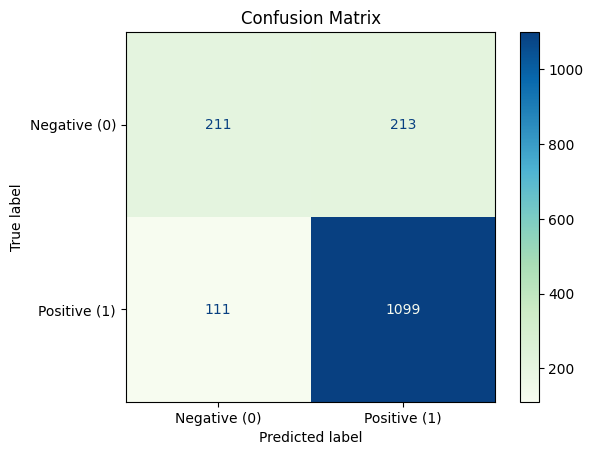

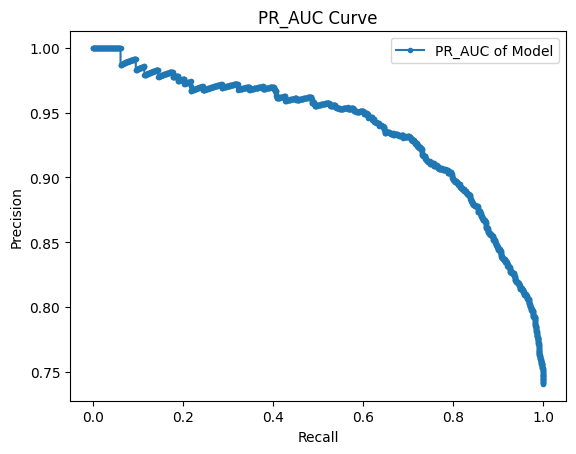

In [ ]:
train_XGB(features_df_train, features_df_test)

## Vader (Valence Aware Dictionary for Sentiment Reasoning) - Pretrained Model

##### VADER is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.

TRAIN DATA RESULTS
Train accuracy :0.8191601049868766
Train F1 :0.8861345232193026
Train F1_weighted :0.8016161369221685
Train pr_auc :0.928612161702605
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.45      0.56       424
           1       0.83      0.95      0.88      1210

    accuracy                           0.82      1634
   macro avg       0.79      0.70      0.72      1634
weighted avg       0.81      0.82      0.80      1634

PR_AUC score:  0.9372008776712862


<Figure size 640x480 with 0 Axes>

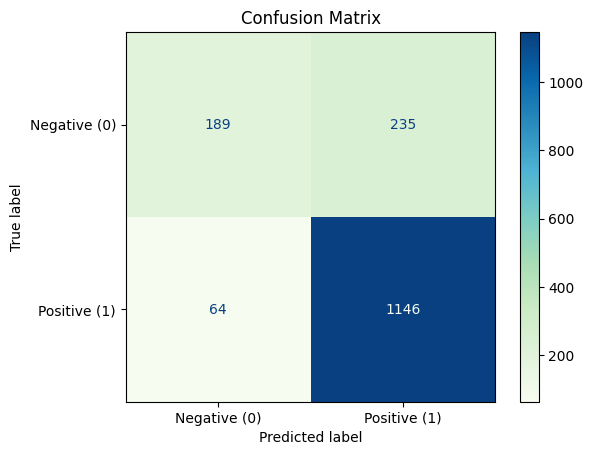

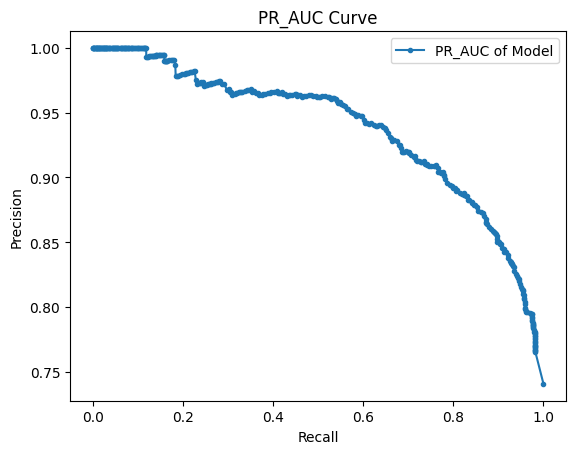

In [ ]:
vader(flair_train, flair_test)

## Flair - Pretrained Model

TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       990
           1       0.99      0.93      0.96      2820

    accuracy                           0.94      3810
   macro avg       0.91      0.95      0.93      3810
weighted avg       0.95      0.94      0.94      3810

PR_AUC score:  0.9945621450956299


<Figure size 640x480 with 0 Axes>

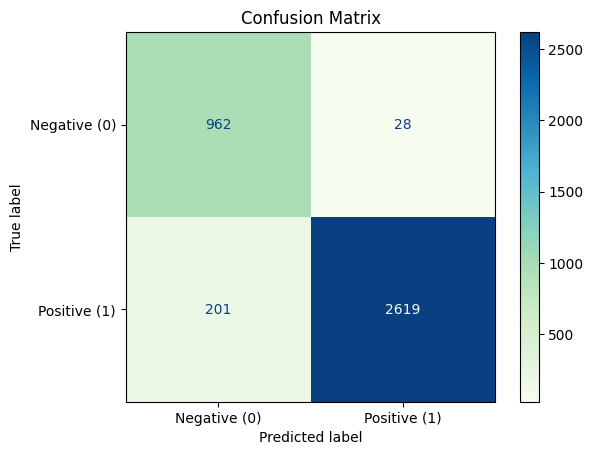

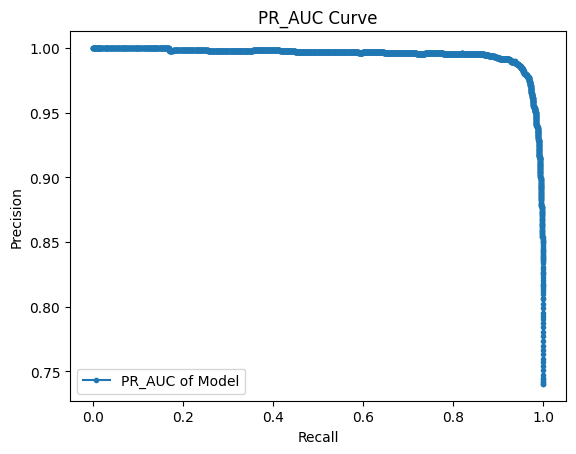

In [ ]:
flair_pred_train = flair_predict(flair_train)
evaluate_model_test(flair_train['Sentiment'], flair_pred_train['flair_sentiment'] , flair_pred_train['flair_prob'])

TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       424
           1       0.99      0.92      0.95      1210

    accuracy                           0.93      1634
   macro avg       0.90      0.94      0.91      1634
weighted avg       0.94      0.93      0.93      1634

PR_AUC score:  0.9960352417319926


<Figure size 640x480 with 0 Axes>

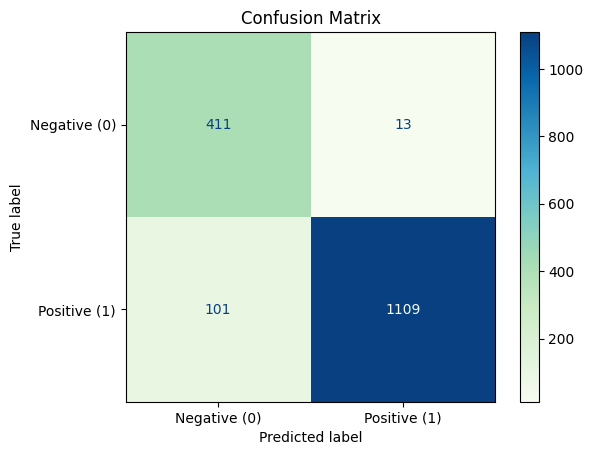

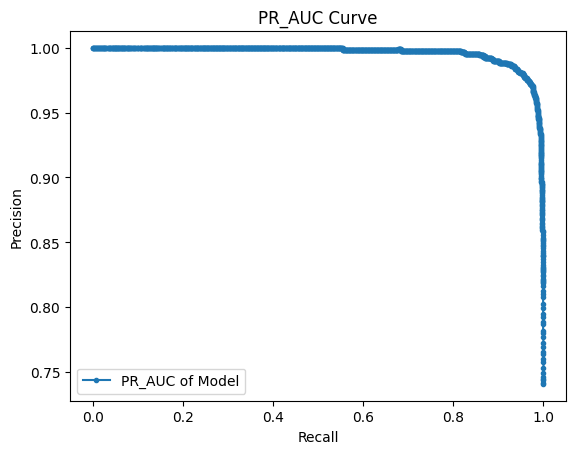

In [ ]:
flair_pred = flair_predict(flair_test)
evaluate_model_test(features_df_test['Sentiment'], flair_pred['flair_sentiment'] , flair_pred['flair_prob'])

## Performance Evaluation

Performance Comparision Table

|    Model             |    Weighted F1 (train)    |       Weighted F1 (Test)| PR_AUC (TRAIN) | PR_AUC (TEST) |  Evaluation|
| -----------          | -----------               | -----------             |-----------     |-----------    |   -----| 
|  Naive Baye's        |    0.72   |     0.54 |      0.81      | 0.72  | Overfit train data (Baseline performance) |
|  Logistic Regression |    0.88                   |    0.86                     |      0.96      | 0.96    | Good but SVM performs better |
|   Non - Linear SVM   |    0.9                    |     0.87                    |      0.97      | 0.97    | Best Performance (with our own pre-processing)|
|   XGBoost            |    0.9                    |     0.79                    |      0.96      | 0.94   | Overfit train data|
|   Vader              |    0.80                   |     0.87                    |      0.93      | 0.94   | Rule-based, not the best approach|
|   Flair              |    0.94                   |      0.93                   |      0.99      | 0.99   | Best perfromance (pretrained)|

#### NLP-Augmentation Drawback : Overall the training scores are slightly higher than the test scores for all models. We believe this might be due to our augmentation on the negative training examples. In the cross-validation, if the original negative example and augmented negative example, are divided into the train and test data respectively, then this would cause the classification to be correct no matter what. 

- Non-Linear SVM - Performs better on the 'positive' sentiment class 

- Flair - Performs better on the 'negative' sentiment class

- Idea : We expect that ensembling both these models would result in a classifier that performs well on both the 'positive'and 'negative' sentiment class, with the best trade-off.  

Ensembling technique : AGGREGATION (Average)

## Ensemble Flair and SVM (best performing model)

In [ ]:
final_results = SA_MODEL_PREDICT(features_df_test.iloc[: , :-1],flair_test, mode = 'train')
final_results

,flair_sentiment,flair_prob,svm_sentiment,svm_prob,avg_prob,final_sentiment,Sentiment,Time,Text
0,1,0.999910,0,0.444288,0.722099,1,positive,17/4/21,I am a die hard soda pop fan. I will drink jui...
1,1,0.998684,1,0.994145,0.996414,1,positive,9/12/20,As i have stated before i love cheery flavor s...
2,1,0.998803,1,1.000000,0.999402,1,positive,8/9/20,These are very good. Nice and soft. Would for ...
3,0,0.000015,0,0.490937,0.245476,0,negative,10/7/21,this item is over priced. I but the 12oz pack...
4,0,0.000003,1,0.528701,0.264352,0,negative,20/11/19,"Although some may like this drink, it will not..."
...,...,...,...,...,...,...,...,...,...
1629,0,0.000053,0,0.086405,0.043229,0,negative,14/1/21,I opened the can and immediately became concer...
1630,1,0.999920,0,0.455445,0.727682,1,positive,14/1/21,So happy I got this on a subscription. I might...
1631,1,0.999833,1,0.939989,0.969911,1,positive,13/7/21,"Our family loves these chips, they are light, ..."
1632,1,0.999962,1,0.999990,0.999976,1,positive,15/6/21,We really like this peanut butter. The taste i...


TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       424
           1       0.99      0.94      0.96      1210

    accuracy                           0.94      1634
   macro avg       0.91      0.95      0.93      1634
weighted avg       0.95      0.94      0.94      1634

PR_AUC score:  0.9926245512232478


<Figure size 640x480 with 0 Axes>

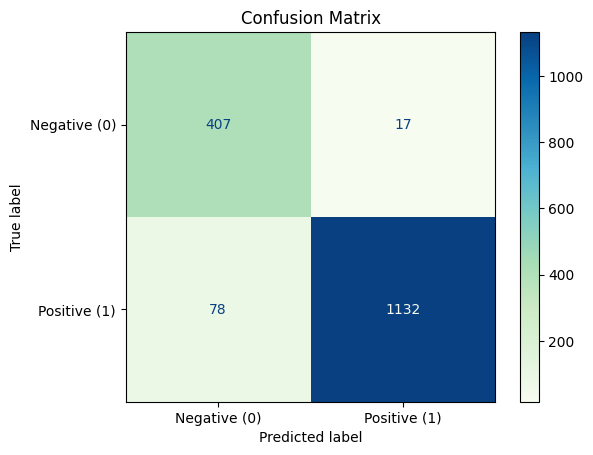

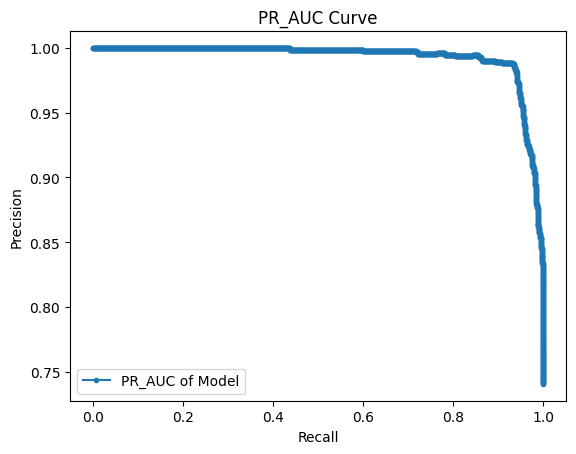

In [ ]:
evaluate_model_test(features_df_test['Sentiment'], final_results['final_sentiment'] , final_results['avg_prob'])

In [ ]:
final_results.to_csv('final_results_on_test.csv')

### As we expected, our ensemble model performs the best overall the models. With a weighted-F1 score of 0.94 and PR_AUC of 0.99. 

## Train Final SVM Model on full dataset for future predictions on unseen data

In [ ]:
features_df_train_full = final_full_data_preprocess(reviews_csv)
# To shuffle data
features_df_train_full  = features_df_train_full.sample(frac=1).reset_index(drop=True)
features_df_train_full

Shape after augmenting negative training samples:  (6858, 3)


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2664,PC_tfidf2665,PC_tfidf2666,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.041589,0.009081,-0.002536,0.034611,-0.008048,-0.036734,-0.012363,-0.005981,-0.077510,-0.000936,...,0.000198,0.001232,0.002033,-0.385935,-0.176745,-0.104124,0.311515,-0.495444,0.163959,1
1,0.110819,-0.071884,-0.009000,-0.047442,-0.040894,0.056289,0.118499,-0.003754,-0.055676,-0.030624,...,-0.006357,0.001388,0.004336,0.746796,0.435013,-0.154338,-0.172873,-0.041595,0.047294,1
2,0.060110,-0.063310,-0.012598,-0.006113,0.116144,0.024389,0.003368,-0.010780,0.044967,0.020790,...,-0.002433,-0.002866,0.003251,0.573447,0.072773,0.185553,0.055366,0.061029,-0.044537,1
3,0.099220,-0.029603,0.008112,0.053888,0.020080,-0.026690,0.011760,0.006884,-0.013187,0.000743,...,-0.001327,-0.012208,0.008475,1.770617,-0.660644,-0.531287,0.184419,-0.074567,-0.136905,1
4,-0.041950,0.285958,-0.199213,-0.023577,-0.029887,0.032928,-0.019996,0.042090,0.001139,-0.037165,...,-0.000259,-0.001655,0.004430,-0.678326,-0.613277,0.025101,-0.219959,-0.204167,0.043053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,0.311314,-0.032685,-0.012806,0.033667,0.087413,-0.057347,0.014867,-0.014518,-0.084563,-0.060599,...,0.006333,0.004698,-0.001135,3.058754,-0.701087,-0.070295,-0.109198,-0.182499,-0.083830,1
6854,-0.075185,-0.030982,-0.012354,-0.046337,0.129977,-0.084245,0.010980,-0.023990,0.052694,0.085296,...,0.000128,-0.006361,0.001511,-0.404676,-0.289539,0.825889,0.592581,-0.256049,0.127078,1
6855,-0.038259,-0.014752,-0.000655,-0.046356,-0.002245,-0.131326,-0.056241,-0.001400,-0.007447,0.097144,...,0.003952,0.010947,-0.004811,-0.599188,-0.334913,0.703053,-0.191951,0.050200,-0.121850,0
6856,-0.049707,0.000276,0.000466,0.045013,-0.021008,0.040408,0.069450,0.015993,-0.062819,0.016220,...,-0.015036,-0.008926,0.001932,-0.687659,-0.631717,-0.156357,-0.079145,0.095145,-0.035735,1


In [ ]:
# Final SVM model fit on full dataset
final_svm_full_model(features_df_train_full)

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.9014324204204971
Average Cross Validation score F1 :0.916333538648443
Average Cross Validation score F1_weighted :0.9013763721839586
Average Cross Validation score pr_auc :0.973739753476077


## Testing Demo (Scoring Function on New Data)

In [14]:
test_df = reviews_csv[['Time', 'Text']]
SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR = SA_PREPROCESS_TEST(test_df[0:20])

In [15]:
SA_PREDICTIONS_DF = SA_MODEL_PREDICT(SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR, "predict")

In [16]:
SA_PREDICTIONS_DF.head()

,flair_sentiment,flair_prob,svm_sentiment,svm_prob,avg_prob,final_sentiment,Sentiment,Time,Text
0,1,0.999592,1,0.993929,0.996761,1,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,1,0.994386,1,0.751788,0.873087,1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,0,0.002182,1,0.647903,0.325043,0,negative,18/6/21,"Before I was educated about feline nutrition, ..."
3,1,0.999975,1,0.957033,0.978504,1,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,1,0.999988,1,0.909521,0.954754,1,positive,1/7/21,I bought this coffee because its much cheaper ...


In [17]:
SA_PREDICTIONS_DF = SA_PREDICTIONS_DF[["Time", "Text", "avg_prob", "Sentiment"]]
SA_PREDICTIONS_DF.rename(columns={"avg_prob":"predicted_sentiment_probability", "Sentiment":"predicted_sentiment"}, inplace=True)
SA_PREDICTIONS_DF.head()
SA_PREDICTIONS_DF.to_csv("reviews_test_predictions_CAJN.csv", index = False)

In [19]:
def scoring(test_df):

   # SA Preprocessing
   SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR = SA_PREPROCESS_TEST(test_df)

   # SA Predictions
   SA_PREDICTIONS_DF = SA_MODEL_PREDICT(SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR, "predict")
   SA_PREDICTIONS_DF = SA_PREDICTIONS_DF[["Time", "Text", "avg_prob", "Sentiment"]]
   
   
    
    # Rename columns to desired outputs
   SA_PREDICTIONS_DF.rename(columns={"avg_prob":"predicted_sentiment_probability", "Sentiment":"predicted_sentiment"}, inplace=True)

    # Save/return results
   SA_PREDICTIONS_DF.to_csv("reviews_test_predictions_CAJN.csv", index = False)

   return SA_PREDICTIONS_DF

In [20]:
#input_file = "path_to_file"
#test_df = pd.read_csv(input_file)
test_df = reviews_csv[['Time', 'Text']]
scoring_results = scoring(test_df[0:10])

scoring_results

,Time,Text,predicted_sentiment_probability,predicted_sentiment
0,18/6/21,This is a very healthy dog food. Good for thei...,0.996761,positive
1,7/7/21,I've been very pleased with the Natural Balanc...,0.873087,positive
2,18/6/21,"Before I was educated about feline nutrition, ...",0.325043,negative
3,7/7/21,"My holistic vet recommended this, along with a...",0.978504,positive
4,1/7/21,I bought this coffee because its much cheaper ...,0.954754,positive
5,7/7/21,"Like the other people mentioned, this coffee h...",0.999974,positive
6,23/7/21,A good tasting light chip that has some value ...,0.999700,positive
7,20/7/21,A grande item ! Delicious fish with the ultim...,0.969303,positive
8,19/7/21,I ordered this product two times now and have ...,0.980792,positive
9,18/6/21,This stuff is great because it's low glycemic....,0.999887,positive
